In [1]:
import PSILOGIT
import numpy as np
from PSILOGIT.tools import *
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import matplotlib.pyplot as plt

# Experiments for Section 6.1

### First example with a small selection event. $p=20, \lambda=1.5, n=10$

In [123]:
model = PSILOGIT.PSILOGIT(np.ones(20), 1.5,  n=10)
print('Size of the set of active variables: ', len(model.M))
nbM_admissibles, ls_states_admissibles = model.compute_selection_event(compare_with_energy=True)
print('Size of the selection event: ', len(ls_states_admissibles))

3


In [125]:
def linear_temperature(t):
    return 0.2/np.log(t+1)

states, ls_FNR, energies = model.SEI_SLR(total_length_SEISLR_path=50000, backup_start_time=2000, temperature=linear_temperature, repulsing_force=True, random_start=True, conditioning_signs=False, seed=0)

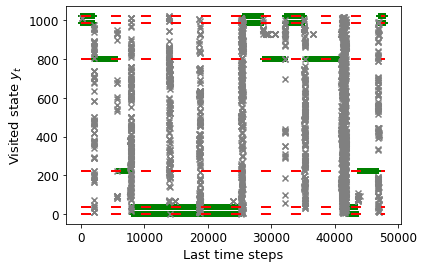

In [126]:
model.last_visited_states(states, ls_states_admissibles)

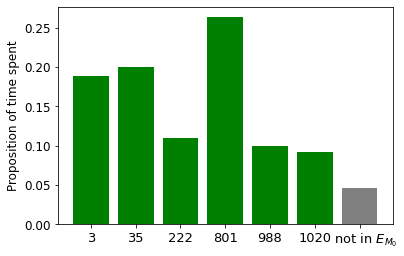

In [128]:
model.histo_time_in_selection_event(states, ls_states_admissibles)

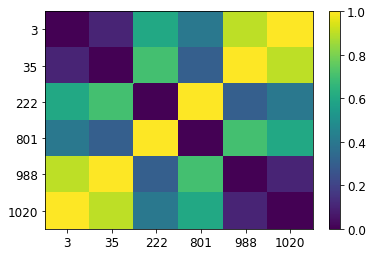

In [129]:
q = len(ls_states_admissibles)
cov = np.zeros((q,q))
for i in range(q):
    for j in range(q):
        cov[i,j] = np.sum(np.array(ls_states_admissibles[i])!=np.array(ls_states_admissibles[j])) / model.X.shape[0]
fig, ax = plt.subplots()
heatmap = ax.pcolor(cov)

#legend
cbar = plt.colorbar(heatmap)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(cov.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cov.shape[0]) + 0.5, minor=False)
ax.invert_yaxis()

#labels
column_labels = [int(fy) for fy in nbM_admissibles]
row_labels = column_labels
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

### Second example with a larger selection event. $p=15, \lambda=2, n=10$

In [6]:
model = PSILOGIT.PSILOGIT(np.zeros(15), 2,  n=10)
print('Size of the set of active variables: ', len(model.M))

def linear_temperature(t):
    return 0.2/np.log(t+1)

states, ls_FNR, energies = model.SEI_SLR(total_length_SEISLR_path=100000, backup_start_time=2000, temperature=linear_temperature, repulsing_force=True, random_start=True, conditioning_signs=False, seed=0)
nbM_admissibles, ls_states_admissibles = model.compute_selection_event(compare_with_energy=True)
print('Size of the selection event: ', len(ls_states_admissibles))

Size of the set of active variables:  2


  0%|          | 0/100000 [00:00<?, ?it/s]

Size of the selection event:  22


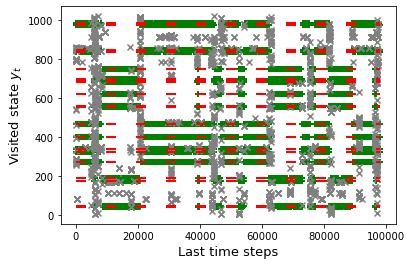

In [10]:
model.last_visited_states(states, ls_states_admissibles)

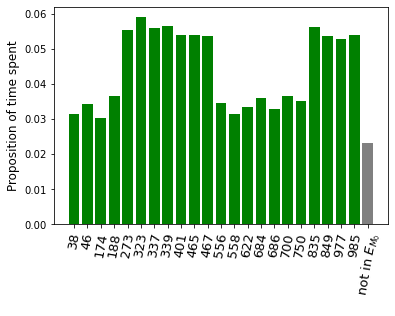

In [9]:
model.histo_time_in_selection_event(states, ls_states_admissibles, rotation_angle=80)

# Experiments of Section 6.2.2: Calibration

Size of the set of active variables:  8


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

  0%|          | 0/287 [00:00<?, ?it/s]

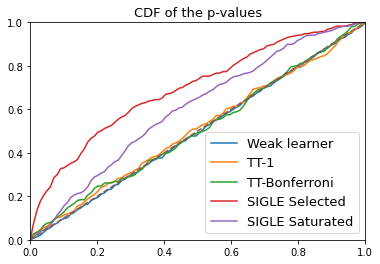

In [3]:
## CHOOSE THE REGULARIZATION PARAMETER
lamb = 0.5

model = PSILOGIT.PSILOGIT(np.zeros(10), lamb, n=100)
print('Size of the set of active variables: ', len(model.M))
states = model.SEI_by_sampling(model.sig, nb_ite=100000)
thetanull = np.zeros(model.X.shape[1])
signull = sigmoid(model.X @ thetanull)
if np.max(np.abs(signull-model.sig))<1e-3:
    statesnull = np.copy(states)
else:
    statesnull = model.SEI_by_sampling(signull, nb_ite=100000)
tildeGN12, barpi = model.params_saturated(signull, statesnull)
lspvals_selec, lspvals_sat, gaps = model.pval_SIGLE(states, barpi, l2_regularization=100000, grad_descent={'lr':0.01,'return_gaps':True,'max_ite':10000}, 
                                                    calibrated_from_samples=False, statesnull=statesnull)
gamma = np.zeros(len(model.M))
gamma[0] = 1
lspvals_tay_1 = model.pval_taylor(states, thetanull=thetanull, gamma=gamma)
lspvals_tay_Bon = model.pval_taylor(states, thetanull=thetanull, mode='Bonferroni')
lspvals_naive = model.pval_weak_learner(statesnull, states, barpi, signull=signull)
lists_pvalues = [lspvals_naive, lspvals_tay_1, lspvals_tay_Bon, lspvals_selec, lspvals_sat]
names = ['Weak learner', "TT-1", 'TT-Bonferroni', 'SIGLE Selected', 'SIGLE Saturated']
model.plot_cdf_pvalues(lists_pvalues, names, states = states, sigalt=model.sig)

# Experiments of Section 6.2.3


## Power analysis: Setting 1
### Localized and Disseminated alternatives

Size of the set of active variables:  5


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

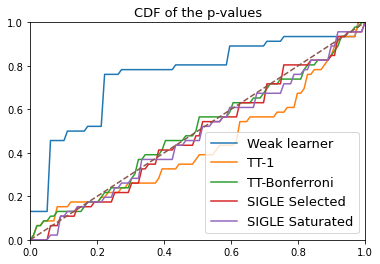

In [12]:
## CHOOSE THE SIGNAL STRENGTH
nu = 0.04

## CHOOSE THE MODE (LOCALIZED OR DISSEMINATED)
modes = ['disseminated-signal' ,'localized-signal']
mode = modes[0]

## CHOOSE THE NUMBER OF STEP FOR THE REJECTION SAMPLING METHOD 
## (for the results presented in the paper, we used nb_ite=3 000 000)
nb_ite = 100000


if mode=='localized-signal':
    vartheta = np.zeros(10)
    vartheta[0] = nu
else:
    vartheta = nu*np.ones(10)

model = PSILOGIT.PSILOGIT(vartheta, 5, n=100)
print('Size of the set of active variables: ', len(model.M))
states = model.SEI_by_sampling(model.sig, nb_ite=nb_ite)
thetanull = np.zeros(model.X.shape[1])
signull = sigmoid(model.X @ thetanull)
if np.max(np.abs(signull-model.sig))<1e-3:
    statesnull = np.copy(states)
else:
    statesnull = model.SEI_by_sampling(signull, nb_ite=nb_ite)
tildeGN12, barpi = model.params_saturated(signull, statesnull)
lspvals_selec, lspvals_sat, gaps = model.pval_SIGLE(states, barpi, l2_regularization=100000, grad_descent={'lr':0.01,'return_gaps':True,'max_ite':10000}, calibrated_from_samples=True, statesnull=statesnull)
gamma = np.zeros(len(model.M))
gamma[0] = 1
lspvals_tay_1 = model.pval_taylor(states, thetanull=thetanull, gamma=gamma)
lspvals_tay_Bon = model.pval_taylor(states, thetanull=thetanull, mode='Bonferroni')
lspvals_naive = model.pval_weak_learner(statesnull, states, barpi, signull=signull)
lists_pvalues = [lspvals_naive, lspvals_tay_1, lspvals_tay_Bon, lspvals_selec, lspvals_sat]
names = ['Weak learner', "TT-1", 'TT-Bonferroni', 'SIGLE Selected', 'SIGLE Saturated']
model.plot_cdf_pvalues(lists_pvalues, names, states = states, sigalt=model.sig)

### Code to reproduce the figure of the paper presenting the power with respect to the signal strength $\nu$: To run on a cluster !

In [2]:
assert False, 'Comment the first assertion if we are aware that this portion of code will take several hours to be completely executed. Create beforehand a folder "data" at the root.'
modes = ['disseminated-signal' ,'localized-signal']
mode = modes[0]

if mode=='localized-signal':
    lsnu = [round(0.1*i,2) for i in range(0,11)]
else:
    lsnu =  [round(0.02*i,2) for i in range(0,16)]
    
    
for nu in lsnu:
    theta = nu * np.ones(10)
    model = PSILOGIT.PSILOGIT(theta, 5, n=100)
    print('Size of the set of active variables: ', len(model.M))
    print('nu: ', nu)
    states = model.SEI_by_sampling(model.sig, nb_ite=3000000)
    np.save('data/states-n100-p10-lamb5-nu'+str(nu)+'.npy',states)

names = ['Weak learner', "TT-1", 'TT-Bonferroni', 'SIGLE Selected', 'SIGLE Saturated']

power = np.zeros((len(lsnu),len(names)))
for idxnu, nu in enumerate(lsnu):
    if mode=='localized-signal':
        vartheta = np.zeros(10)
        vartheta[0]=nu
    else:
        vartheta = nu*np.ones(10)
    model = PSILOGIT.PSILOGIT(vartheta, 5, n=100)
    print('Size of the set of active variables: ', len(model.M))
    print('nu: ', nu)
    if mode == 'localized-signal':
        states = np.load('data/states-1coor-n100-p10-lamb5-nu'+str(nu)+'.npy')
    else:
        states = np.load('data/states-n100-p10-lamb5-nu'+str(nu)+'.npy')
    states = states
    thetanull = np.zeros(model.X.shape[1])
    signull = sigmoid(model.X @ thetanull)
    if mode == 'localized-signal':
        statesnull = np.load('data/states-1coor-n100-p10-lamb5-nu0.0.npy')
    else:
        statesnull = np.load('data/states-n100-p10-lamb5-nu0.0.npy')
    tildeGN12, barpi = model.params_saturated(signull, statesnull)

    lspvals_selec, lspvals_sat, gaps = model.pval_SIGLE(states, barpi, l2_regularization=100000, grad_descent={'lr':0.01,'return_gaps':True,'max_ite':10000}, calibrated_from_samples=True, statesnull=statesnull)

    gamma = np.zeros(len(model.M))
    gamma[0] = 1
    lspvals_tay_1 = model.pval_taylor(states, thetanull=thetanull, gamma=gamma)
    lspvals_tay_Bon = model.pval_taylor(states, thetanull=thetanull, mode='Bonferroni')
    lspvals_naive = model.pval_weak_learner(statesnull, states, barpi, signull=signull)

    lists_pvalues = [lspvals_naive, lspvals_tay_1, lspvals_tay_Bon, lspvals_selec, lspvals_sat]
    power[idxnu,:] = model.compute_power(lists_pvalues, names, states = states, sigalt=model.sig)

if mode == 'localized-signal':
    np.save('data/1coor-n100-p10-lamb5-power-nu.npy',power)
else:
    np.save('data/n100-p10-lamb5-power-nu.npy',power)

for j,name in enumerate(np.array(names)):
    plt.plot(lsnu, power[:,j], label=name)
if mode=='localized-signal':
    plt.xlabel('$\\nu$ such that $\\vartheta^*=[\\nu,0, ..., 0]$', fontsize=14)
else:
    plt.xlabel('$\\nu$ such that $\\vartheta^*=[\\nu, ..., \\nu]$', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.legend()
plt.savefig('data/n100-p10-lamb5-power_nu.png', dpi=300)
plt.show()

Size of the set of active variables:  4
nu:  0.0


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

Size of the set of active variables:  3
nu:  0.02


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/5618 [00:00<?, ?it/s]

Size of the set of active variables:  5
nu:  0.04


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/1310 [00:00<?, ?it/s]

Size of the set of active variables:  4
nu:  0.06


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3050 [00:00<?, ?it/s]

Size of the set of active variables:  4
nu:  0.08


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3176 [00:00<?, ?it/s]

Size of the set of active variables:  4
nu:  0.1


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4224 [00:00<?, ?it/s]

Size of the set of active variables:  3
nu:  0.12


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/8184 [00:00<?, ?it/s]

Size of the set of active variables:  3
nu:  0.14


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/7911 [00:00<?, ?it/s]

Size of the set of active variables:  6
nu:  0.16


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2619 [00:00<?, ?it/s]

Size of the set of active variables:  6
nu:  0.18


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3337 [00:00<?, ?it/s]

Size of the set of active variables:  6
nu:  0.2


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4201 [00:00<?, ?it/s]

Size of the set of active variables:  7
nu:  0.22


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/2558 [00:00<?, ?it/s]

Size of the set of active variables:  7
nu:  0.24


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/3346 [00:00<?, ?it/s]

Size of the set of active variables:  7
nu:  0.26


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/4228 [00:00<?, ?it/s]

Size of the set of active variables:  7
nu:  0.28


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/5233 [00:00<?, ?it/s]

Size of the set of active variables:  7
nu:  0.3


  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

  0%|          | 0/2380 [00:00<?, ?it/s]

  0%|          | 0/6381 [00:00<?, ?it/s]

## Power analysis: Setting 2
### Code to generate states from the SEI-SLR algorithm in the Setting 2: Running this cell will take 50 minutes.

In [ ]:
### Theta
vartheta = np.zeros(20)

model = PSILOGIT.PSILOGIT(vartheta, 3,  n=15)
def linear_temperature(t):
    return 0.2/np.log(t+1)**2

states, ls_FNR, energiesnull = model.SEI_SLR(total_length_SEISLR_path=1000000, backup_start_time=2000, temperature=linear_temperature, repulsing_force=True, random_start=True, conditioning_signs=False, seed=0)
idxs = np.where(energiesnull<1e-3)[0]
fy_EM = list(set([binary_encoding(statesnull[i]) for i in idxs]))
states = np.array([binary_encoding_inv(fy, model.X.shape[0]) for fy in fy_EM])


### A fast way to reproduce the results of the paper

###### --> Calibration

  0%|          | 0/940 [00:00<?, ?it/s]

  0%|          | 0/940 [00:00<?, ?it/s]

  0%|          | 0/940 [00:00<?, ?it/s]

  0%|          | 0/940 [00:00<?, ?it/s]

  0%|          | 0/940 [00:00<?, ?it/s]

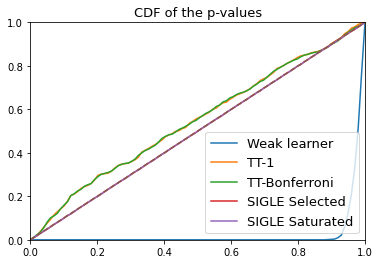

In [15]:
model = PSILOGIT.PSILOGIT(np.zeros(20), 3,  n=15)
model.sampling_algorithm = 'SA'
nbM_admissibles, ls_states_admissibles = model.compute_selection_event(compare_with_energy=True)
thetanull = np.zeros(model.X.shape[1])
signull = sigmoid(model.X @ thetanull)
tildeGN12, barpi = model.params_saturated(signull, ls_states_admissibles)
lspvals_selec, lspvals_sat, gaps = model.pval_SIGLE(ls_states_admissibles, barpi, l2_regularization=100000, grad_descent={'lr':0.01,'return_gaps':True,'max_ite':10000}, calibrated_from_samples=True, signull=signull, statesnull=ls_states_admissibles)
gamma = np.zeros(len(model.M))
gamma[0] = 1
lspvals_tay_1 = model.pval_taylor(ls_states_admissibles, thetanull=thetanull, gamma=gamma)
lspvals_tay_Bon = model.pval_taylor(ls_states_admissibles, thetanull=thetanull, mode='Bonferroni')
lspvals_naive = model.pval_weak_learner(ls_states_admissibles, ls_states_admissibles, barpi, signull=signull)
lists_pvalues = [lspvals_naive, lspvals_tay_1, lspvals_tay_Bon, lspvals_selec, lspvals_sat]
names = ["Weak learner",  "TT-1", 'TT-Bonferroni', 'SIGLE Selected', 'SIGLE Saturated']
model.plot_cdf_pvalues(lists_pvalues, names, states = ls_states_admissibles, sigalt=model.sig)

###### --> Alternative

Size of the set of active variables:  2


  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

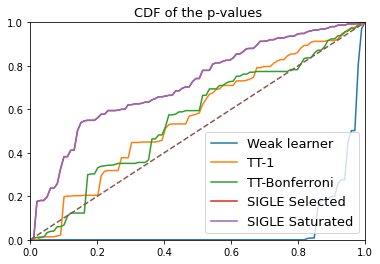

In [64]:
modes = ['disseminated-signal' ,'localized-signal']
mode = modes[1]

if mode=='localized-signal':
    theta = np.zeros(20)
    theta[0] = 3
else:
    theta = 1.5 * np.ones(20)
    
model = PSILOGIT.PSILOGIT(theta, 3,  n=15)
print('Size of the set of active variables: ', len(model.M))
nbM_admissibles, ls_states_admissibles = model.compute_selection_event(compare_with_energy=True)
model.sampling_algorithm = 'SA'
thetanull = np.zeros(model.X.shape[1])
signull = sigmoid(model.X @ thetanull)
tildeGN12, barpi = model.params_saturated(signull, ls_states_admissibles)
lspvals_selec, lspvals_sat, gaps = model.pval_SIGLE(ls_states_admissibles, barpi, l2_regularization=100000, grad_descent={'lr':0.01,'return_gaps':True,'max_ite':10000}, calibrated_from_samples=True, signull=signull, statesnull=ls_states_admissibles)
gamma = np.zeros(len(model.M))
gamma[0] = 1
lspvals_tay_1 = model.pval_taylor(ls_states_admissibles, thetanull=thetanull, gamma=gamma)
lspvals_tay_Bon = model.pval_taylor(ls_states_admissibles, thetanull=thetanull, mode='Bonferroni')
lspvals_naive = model.pval_weak_learner(ls_states_admissibles, ls_states_admissibles, barpi, signull=signull)
lists_pvalues = [lspvals_naive, lspvals_tay_1, lspvals_tay_Bon, lspvals_selec, lspvals_sat]
names = ["Weak learner",  "TT-1", 'TT-Bonferroni', 'SIGLE Selected', 'SIGLE Saturated']
model.plot_cdf_pvalues(lists_pvalues, names, states = ls_states_admissibles, sigalt=model.sig, figname='alt1p5-n15-p20-lamb.png')

# Experiments for Section 6.3.5

#### a) Under the null

In [49]:
model_size2 = PSILOGIT.PSILOGIT(0*np.ones(5), 7, n=100)
print('Size of the selection event: ', len(model_size2.M))

signull = 0.5 * np.ones(model_size2.X.shape[0])

Size of the selection event:  2


In [50]:
states2 = model_size2.SEI_by_sampling(model_size2.sig, nb_ite=100000)
print(len(states2))
statesnull = model_size2.SEI_by_sampling(signull, nb_ite=100000)
tildeGN12, barpi = model_size2.params_saturated(signull, statesnull)

  0%|          | 0/100000 [00:00<?, ?it/s]

1662


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/1662 [00:00<?, ?it/s]

Proportion in the ellipse :  0.9494584837545126
Proportion outside of the ellipse :  0.05054151624548736


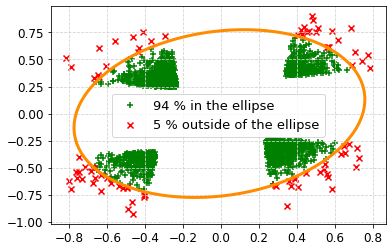

In [51]:
model_size2.ellipse_testing(states2, barpi, alpha=0.05, figname='data/null-ellipse.png', grad_descent={'lr':0.01,'return_gaps':True,'max_ite':5000}, calibrated_from_samples=True, statesnull=statesnull, l2_regularization=100000)

#### b) Under the alternative

In [119]:
theta = np.zeros(10)
theta[0] = 0.5
model_size2 = PSILOGIT.PSILOGIT(theta, 8, n=100)
print('Size of the selection event: ', len(model_size2.M))

signull = 0.5 * np.ones(model_size2.X.shape[0])

Size of the selection event:  2


In [120]:
states2 = model_size2.SEI_by_sampling(model_size2.sig, nb_ite=100000)
print(len(states2))
statesnull = model_size2.SEI_by_sampling(signull, nb_ite=100000)
tildeGN12, barpi = model_size2.params_saturated(signull, statesnull)

  0%|          | 0/100000 [00:00<?, ?it/s]

3210


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/435 [00:00<?, ?it/s]

Proportion in the ellipse :  0.7514018691588785
Proportion outside of the ellipse :  0.2485981308411215


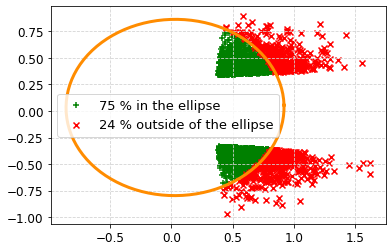

In [122]:
model_size2.ellipse_testing(states2, barpi, alpha=0.05, figname='data/alt-ellipse-1p5-lamb8.png', grad_descent={'lr':0.01,'return_gaps':True,'max_ite':5000}, calibrated_from_samples=True, statesnull=statesnull, l2_regularization=100000)

In [ ]:
# probas = [compute_proba(ls_states_admissibles[i], model.sig) for i in range(len(ls_states_admissibles))]
# probas /= np.sum(probas)

# idxs = np.random.choice([i for i in range(len(ls_states_admissibles))], size=3000, p=probas)
# states = np.array([ls_states_admissibles[i] for i in idxs])

# idxs = np.random.choice([i for i in range(len(ls_states_admissibles))], size=3000)
# statesnull = np.array([ls_states_admissibles[i] for i in idxs])

# thetanull = np.zeros(model.X.shape[1])
# signull = sigmoid(model.X @ thetanull)
# tildeGN12, barpi = model.params_saturated(signull, statesnull)